In [48]:
import pandas as pd 
import numpy as np

df = pd.read_csv(r"C:\Users\Seragg 3h\Desktop\Hol\mission1_data.csv")

df.head(5)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,Male,High School,Standard,NaN,10,7,88,94,72
1,Male,High School,Standard,NaN,1,3,67,80,95
2,Male,Bachelor,Free/Reduced,NaN,1,6,84,100,76
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64
4,Female,Associate,Free/Reduced,NaN,2,0,72,92,99


In [49]:
df.isna().sum()

Gender                        0
Parental Education Level      0
Lunch Type                    0
Test Preparation Course     426
Study Time                    0
Absences                      0
Math Score                    0
Reading Score                 0
Writing Score                 0
dtype: int64

In [50]:
df['Test Preparation Course'].unique()

array([nan, 'Completed'], dtype=object)

In [51]:
df['Test Preparation Course'].fillna('Not_Complete' , inplace= True)

C:\Users\Seragg 3h\AppData\Local\Temp\ipykernel_6628\1632232130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Test Preparation Course'].fillna('Not_Complete' , inplace= True)


In [52]:
df['Test Preparation Course'].unique()

array(['Not_Complete', 'Completed'], dtype=object)

In [53]:
df['total_score'] = df['Math Score'] + df['Reading Score'] + df['Writing Score']
df.drop(['Math Score', 'Reading Score', 'Writing Score'] , axis= 1 , inplace= True)

In [54]:
df

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,total_score
0,Male,High School,Standard,Not_Complete,10,7,254
1,Male,High School,Standard,Not_Complete,1,3,242
2,Male,Bachelor,Free/Reduced,Not_Complete,1,6,260
3,Male,Associate,Free/Reduced,Completed,1,1,216
4,Female,Associate,Free/Reduced,Not_Complete,2,0,263
...,...,...,...,...,...,...,...
995,Male,Master,Free/Reduced,Completed,6,5,257
996,Male,Master,Free/Reduced,Completed,10,0,259
997,Male,Master,Free/Reduced,Completed,1,6,275
998,Female,Master,Standard,Completed,10,8,268


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    1000 non-null   object
 1   Parental Education Level  1000 non-null   object
 2   Lunch Type                1000 non-null   object
 3   Test Preparation Course   1000 non-null   object
 4   Study Time                1000 non-null   int64 
 5   Absences                  1000 non-null   int64 
 6   total_score               1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [28]:
df.nunique()

Gender                       2
Parental Education Level     5
Lunch Type                   2
Test Preparation Course      2
Study Time                  10
Absences                    11
total_score                 52
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

le = {}
le_cols = ['Gender', 'Parental Education Level', 'Lunch Type', 'Test Preparation Course']
for col in le_cols:
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])
    
df.head(5)  

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,total_score
0,1,2,1,1,10,7,254
1,1,2,1,1,1,3,242
2,1,1,0,1,1,6,260
3,1,0,0,0,1,1,216
4,0,0,0,1,2,0,263


In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc_cols = ['Study Time' , 'Absences']
df[sc_cols] = sc.fit_transform(df[sc_cols])

df.head(5)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,total_score
0,1,2,1,1,1.000000,0.7,254
1,1,2,1,1,0.000000,0.3,242
2,1,1,0,1,0.000000,0.6,260
3,1,0,0,0,0.000000,0.1,216
4,0,0,0,1,0.111111,0.0,263


In [31]:
df.describe()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,total_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,0.568000,1.932000,0.492000,0.426000,0.482556,0.4629,239.743000
std,0.495602,1.327078,0.500186,0.494741,0.338673,0.3105,20.136495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,193.000000
25%,0.000000,1.000000,0.000000,0.000000,0.222222,0.2000,222.000000
50%,1.000000,2.000000,0.000000,0.000000,0.444444,0.4000,242.000000
75%,1.000000,3.000000,1.000000,1.000000,0.777778,0.7000,256.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.0000,284.000000


In [32]:
# Visualization

In [33]:
x = df.drop('total_score' , axis=1)
y = df['total_score']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [36]:
lr.fit(x_train , y_train)
dt.fit(x_train , y_train)
rf.fit(x_train , y_train)

RandomForestRegressor()

In [37]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE for lr model: ' , mean_absolute_error(y_test , y_pred_lr))
print('MSE for lr model: ' , mean_squared_error(y_test , y_pred_lr))
print('R2 for lr model: ' , r2_score(y_test , y_pred_lr))
print('-'*100)
print('MAE for dt model: ' , mean_absolute_error(y_test , y_pred_dt))
print('MSE for dt model: ' , mean_squared_error(y_test , y_pred_dt))
print('R2 for dt model: ' , r2_score(y_test , y_pred_dt))
print('-'*100)
print('MAE for rf model: ' , mean_absolute_error(y_test , y_pred_rf))
print('MSE for rf model: ' , mean_squared_error(y_test , y_pred_rf))
print('R2 for rf model: ' , r2_score(y_test , y_pred_rf))

MAE for lr model:  16.026235924057172
MSE for lr model:  370.8688024024584
R2 for lr model:  0.007341307383233464
----------------------------------------------------------------------------------------------------
MAE for dt model:  0.23433333333333337
MSE for dt model:  3.0404222222222232
R2 for dt model:  0.9918620775633781
----------------------------------------------------------------------------------------------------
MAE for rf model:  0.27908238759145204
MSE for rf model:  2.9913263675798145
R2 for rf model:  0.9919934863703915


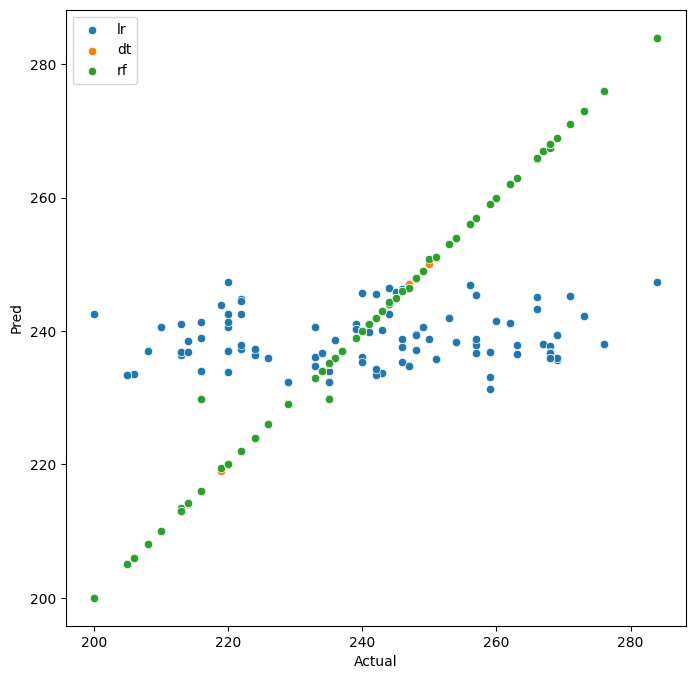

In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = y_pred_lr, label = 'lr')
sns.scatterplot(x = y_test, y = y_pred_dt, label = 'dt')
sns.scatterplot(x = y_test, y = y_pred_rf, label = 'rf')
plt.xlabel('Actual')
plt.ylabel('Pred')
plt.legend()

In [42]:
from sklearn.model_selection import RandomizedSearchCV
rand_params = {
    'max_depth' : [5, 10, 15, 20, 25],
    'n_estimators' : [100, 200, 300, 400, 500]
}

random_model = RandomizedSearchCV(rf , rand_params, cv=5)
random_model.fit(x_train , y_train)
print('Best params for rand model: ', random_model.best_params_)

Best params for rand model:  {'n_estimators': 200, 'max_depth': 20}


In [43]:
y_pred_rand = random_model.best_estimator_.predict(x_test)

print('MAE for rand model: ' , mean_absolute_error(y_test , y_pred_rand))
print('MSE for rand model: ' , mean_squared_error(y_test , y_pred_rand))
print('R2 for rand model: ' , r2_score(y_test , y_pred_rand))

MAE for rand model:  0.2945455779049377
MSE for rand model:  3.0657676841676196
R2 for rand model:  0.9917942384974995


In [45]:
df.nunique()

Gender                       2
Parental Education Level     5
Lunch Type                   2
Test Preparation Course      2
Study Time                  10
Absences                    11
total_score                 52
dtype: int64

In [44]:
df.columns

Index(['Gender', 'Parental Education Level', 'Lunch Type',
       'Test Preparation Course', 'Study Time', 'Absences', 'total_score'],
      dtype='object')

In [63]:
import gradio as gr
def pred_score(Gender, pel, lt, tpc, st, ab):
    try:
        input_data = pd.DataFrame({
            'Gender' : [Gender],
            'Parental Education Level' : [pel],
            'Lunch Type' : [lt],
            'Test Preparation Course' : [tpc],
            'Study Time' : [st],
            'Absences' : [ab]
        })
        
        for col in le_cols:
            input_data[col] = le[col].transform(input_data[col])
            
        input_data[sc_cols] = sc.transform(input_data[sc_cols])
        
        prediction = rf.predict(input_data)
        return f'{prediction[0]:,.2f}'    
    except Exception as e:
        return f"Error: {e}"
gr.Interface(
    fn = pred_score,
    inputs=[
        gr.Dropdown(list(df['Gender'].unique()) , label= 'Gender'),
        gr.Dropdown(list(df['Parental Education Level'].unique()) , label= 'Parental Education Level'),
        gr.Dropdown(list(df['Lunch Type'].unique()) , label= 'Lunch Type'),
        gr.Dropdown(list(df['Test Preparation Course'].unique()) , label= 'Test Preparation Course'),
        gr.Number(label= 'Study Time'),
        gr.Number(label= 'Absences')
    ],
    
    outputs= gr.Textbox(label= 'The pred score'),
    title= 'Pred Score'
).launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [57]:
df.head()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,total_score
0,Male,High School,Standard,Not_Complete,10,7,254
1,Male,High School,Standard,Not_Complete,1,3,242
2,Male,Bachelor,Free/Reduced,Not_Complete,1,6,260
3,Male,Associate,Free/Reduced,Completed,1,1,216
4,Female,Associate,Free/Reduced,Not_Complete,2,0,263
